In [8]:
def select_env(google:bool=True):
    import os
    from google.colab import drive
    drive.mount('/content/gdrive') # 此處需要登入 google 帳號
    return google

In [1]:

!pip install -r"F:\python\qubit_simulate\requirements.txt"

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scqubits as scq
from labellines import labelLine, labelLines

In [3]:
tmon = scq.Transmon(
    EJ=30.0,
    EC=1.2,
    ng=0.3,
    ncut=31
)

In [4]:
transmon = scq.TunableTransmon(
  EJmax=13.71,
  EC=0.229,
  d=0.01,
  flux=0.0,
  ng=0.0,
  ncut=30
)

In [5]:
fluxonium = scq.Fluxonium(
    EJ = 9.74,
    EC = 0.99,
    EL = 0.86,
    flux = 0.5,
    cutoff = 110
    )

In [18]:

def plot_spectrum(qubit, parameter:str='flux', param_vals:np.ndarray=np.linspace(-0.5, 0.5, 101), evals_count:int=5, subtract_ground:bool=False):
  """This function is used for plotting energy spectrum versus parameter like external flux, gate charge,etc.

  Parameters
  ----------
  patameter:
    name of parameter to be varied, 'flux', 'ng', 'd' , etc.
  patameter_list:
    parameter value
  evals_count:
    energy level want to calculate
  substract_ground:
    if True, eigenvalues are returned relative to the ground state eigenvalue
    (default value = False)

  """
  energy = qubit.get_spectrum_vs_paramvals(parameter, parameter_list, evals_count, subtract_ground).energy_table
  #X-axis=flux point, Y-axis=energy point

  if subtract_ground == False:
    trans_pair = [
    (m, n) for m in range(evals_count) for n in range(m+1)
    ]
    evals_count = (evals_count**2+evals_count)/2 #fix the trans_pair number which is create by double for loop.修正pair產生組合數-->finish
    for i in range(int(evals_count)):
      if trans_pair[i][1] == trans_pair[i][0]:
        pass
      else:
        plt.plot(parameter_list, energy[:,trans_pair[i][0]]-energy[:,trans_pair[i][1]], label=f'{trans_pair[i][0]},{trans_pair[i][1]}')
      # plt.plot(parameter_list, energy[:,i], label=f"eigenstate{i}")
    plt.xlabel(r"${\phi_{ext}}$", fontsize=15)
    plt.ylabel("Frequency(GHz)", fontsize=15)
    plt.title("Transistion spectrum", fontsize=15)
    labelLines(plt.gca().get_lines(), align=True, fontsize=11)

  #True 需要思考要放什麼.目前只會show出0-n transition
  else:
    for i in range(evals_count-1):
      plt.plot(parameter_list, energy[:,i+1], label=f'f{0},{i+1}')
    plt.xlabel(r"${\phi_{ext}}$", fontsize=15)
    plt.ylabel("Frequency(GHz)", fontsize=15)
    plt.title("Transition spectrum", fontsize=15)
    plt.legend()
  pass




def plot_matrix_table(qubit, parameter:str='n_operator', evals_count:int=5, subtract_ground:bool=False):
  matrix = qubit.matrixelement_table(parameter, evals_count=6)

  fig = plt.figure(figsize=(6,6))
  axes = plt.subplot(projection='3d')   # 設定為 3D 圖表
  y_count, x_count = matrix.shape  # We label the columns as "x", while rows as "y"
  element_count = x_count * y_count  # total num. of elements to plot

  xgrid, ygrid = np.meshgrid(range(x_count), range(y_count))
  xgrid = xgrid.flatten()
  ygrid = ygrid.flatten()



  zbottom = np.zeros(element_count)
  zheight = np.abs(matrix).flatten()
  dx, dy = 0.75, 0.75


  nrm = mpl.colors.Normalize(0, np.max(zheight))
  colors = plt.cm.viridis(nrm(zheight))
  axes.view_init(azim=210, elev=23)
  axes.bar3d(xgrid, ygrid, zbottom, dx, dy, zheight, color=colors)

  #2d matrix table
  # fig, axes = plt.subplots()
  # axes.matshow(np.abs(matrix), cmap=plt.cm.viridis, interpolation=None)
  # for axis, locs in [
  #     (axes.xaxis, np.arange(matrix.shape[1])),
  #     (axes.yaxis, np.arange(matrix.shape[0])),
  # ]:
  #     axis.set_ticks(locs + 0.5, minor=True)
  #     axis.set(ticks=locs, ticklabels=locs)
  # axes.grid(False)




def plot_matelements(qubit, operator:str='n_operator', param_name:str='flux', param_vals:np.ndarray=np.linspace(0, 1, 101), evals_count:int=5):
    matrix = qubit.get_matelements_vs_paramvals(operator, param_name, param_vals, evals_count).matrixelem_table
    
    
    (row, col) = matrix[0,:,:].shape
    index_pairs = [
        (row, col) for row in range(row) for col in range(row + 1)
    ]
    fig, axes = plt.subplots()
    for row, col in index_pairs:
        y_vals = np.abs(matrix[:, row, col])
        axes.plot(
            param_vals,
            y_vals,
            label=f"{row},{col}",
        )

    plt.xlabel(r"${\phi_{ext}}$", fontsize=15)
    plt.ylabel("matrix element", fontsize=15)

    labelLines(plt.gca().get_lines(), align=True, fontsize=11)
    pass


def measure_spectrum(qubit, parameter:str='flux', param_vals:np.ndarray=np.linspace(-0.5, 0.5, 101), evals_count:int=5):
  energy = qubit.get_spectrum_vs_paramvals(parameter, param_vals, evals_count, subtract_ground=False).energy_table
  #X-axis=flux point, Y-axis=energy point


  trans_pair = [
  (m, n) for m in range(evals_count) for n in range(m+1)
  ]
  evals_count = (evals_count**2+evals_count)/2 #fix the trans_pair number which is create by double for loop.修正pair產生組合數-->finish
  
  for i in range(int(evals_count)):
    if trans_pair[i][1] == trans_pair[i][0]:
      pass
    else:
      plt.plot(param_vals, energy[:,trans_pair[i][0]]-energy[:,trans_pair[i][1]], label=f'{trans_pair[i][0]},{trans_pair[i][1]}')
    # plt.plot(parameter_list, energy[:,i], label=f"eigenstate{i}")
  plt.xlabel(r"${\phi_{ext}}$", fontsize=15)
  plt.ylabel("Frequency(GHz)", fontsize=15)
  plt.title("Transistion spectrum", fontsize=15)
  labelLines(plt.gca().get_lines(), align=True, fontsize=11)



  matrix = qubit.get_matelements_vs_paramvals('n_operator', parameter, param_vals, evals_count).matrixelem_table
  
  
  (row, col) = matrix[0,:,:].shape
  index_pairs = [
      (row, col) for row in range(row) for col in range(row + 1)
  ]
  fig, axes = plt.subplots()
  for row, col in index_pairs:
      y_vals = np.abs(matrix[:, row, col])
      axes.plot(
          param_vals,
          y_vals,
          label=f"{row},{col}",
      )

  plt.xlabel(r"${\phi_{ext}}$", fontsize=15)
  plt.ylabel("matrix element", fontsize=15)

  labelLines(plt.gca().get_lines(), align=True, fontsize=11)
  pass

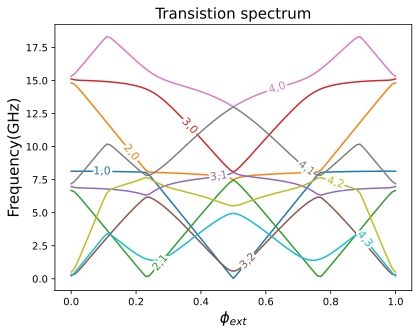

In [19]:
flux_list = np.linspace(0, 1, 101)
plot_spectrum(fluxonium,parameter_list=flux_list, evals_count = 5, subtract_ground=False)


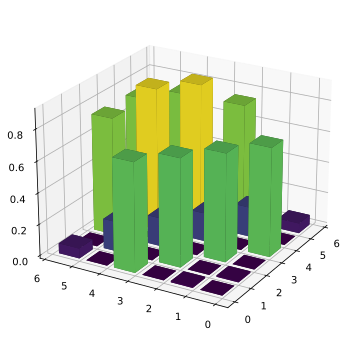

In [20]:
plot_matrix_table(fluxonium)

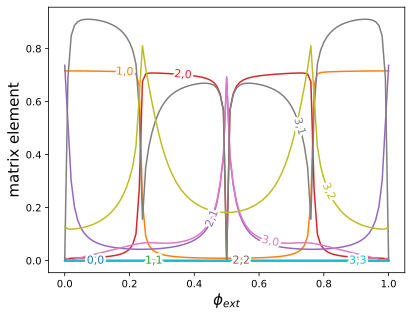

In [21]:
ng_list = np.linspace(0, 1, 101) #use for test transmon
plot_matelements(fluxonium, evals_count=4)

In [11]:
scq.GUI()

Output(layout=Layout(width='100%'))